In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
#plt.style.use('seaborn-white')

## Full sample

In [2]:
filepath = 'D:/BG/Data/Processing/4_data.txt'
data = pandas.read_csv(filepath, sep='\t')
print(data.shape[0],'job postings')

3091485 job postings


## Preparing data

In [111]:
df = data
df['Basic Activities'] = df['basic']
df['Support Activities'] = df['business']+df['finance']+df['management']+df['data_2']+df['cust_1']
df['Advanced Activities'] = df['adv']+df['design']
df['General Skills'] = df['cognitive']+df['social']
df['Job Complexity'] = df['complexity']
measures = ['Basic Activities','Advanced Activities','Support Activities','Job Complexity','General Skills']
df = df[measures+['occupation']]
occupations = ['Managers','Engineers','Technicians','Operators']
df = df.groupby(['occupation']).mean().reindex(occupations)
df

,Basic Activities,Advanced Activities,Support Activities,Job Complexity,General Skills
occupation,,,,,
Managers,0.255863,0.405696,2.708963,2.824043,2.753195
Engineers,0.307471,1.146197,1.251074,3.148422,2.567479
Technicians,0.921413,0.432682,0.477654,0.877270,1.365279
Operators,1.038172,0.191494,0.631601,0.550015,1.170875


## Bars

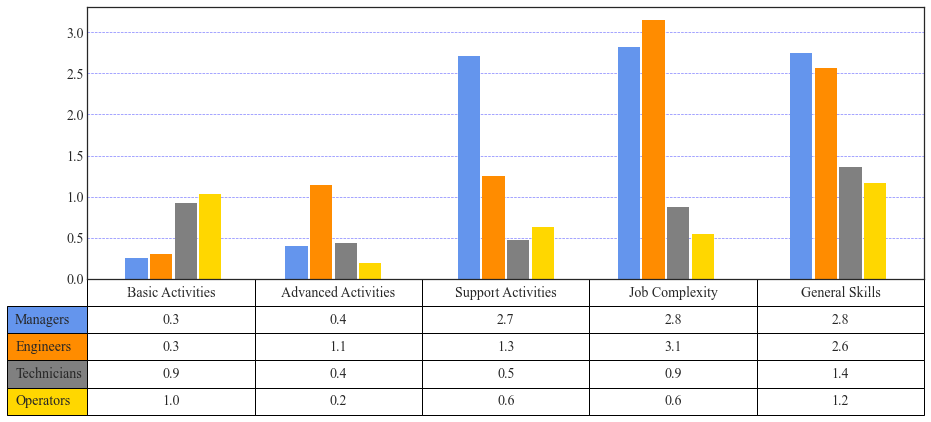

In [178]:
plt.rc("font", family="Times New Roman", size=14)
x = numpy.arange(len(df.index.unique()))
barwidth = 0.9
fig = plt.figure(figsize=(15,5))
mycolors = ['cornflowerblue','darkorange','grey','gold']
for i,j in zip([0,6.5,13.5,20,27],measures):
  barlist=plt.bar(x+i-0.1,df[j],barwidth,align='edge',color=[c for c in mycolors])
plt.grid(axis='y',color='b',linestyle='--',linewidth=0.7,alpha=0.5)
plt.xticks(color='white')

mytable = plt.table(cellText=df.values.round(1),cellLoc='center',rowLabels=occupations,rowColours=mycolors,colLabels=measures,bbox=[0,-0.5,1,0.5],fontsize='large')

fig = plt.gcf()
plt.savefig('Bars_Full.png',bbox_inches='tight',dpi=150)
